<a href="https://colab.research.google.com/github/DurgaManiPothula/SOC/blob/main/DLLAB7_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
mnist = datasets.load_digits()

In [2]:
X=mnist['data']
X.shape

(1797, 64)

In [3]:
y=mnist['target']
y.shape

(1797,)

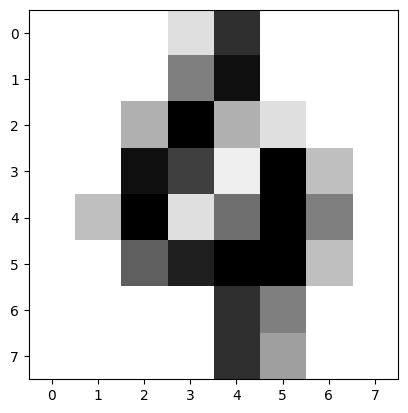

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[100]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show()

In [5]:
y[100]



4

In [6]:
X_train, X_test, y_train, y_test = X[:1348], X[1348:], y[:1348], y[1348:]

In [7]:
y_train_4 = (y_train == 4)#True for all 4s, False for all other digits
y_test_4 = (y_test == 4)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score
#here cv = 3 i.e. k = 3 meaning, training set is split into 3 folds.
cross_val_score(sgd_clf, X_train, y_train_4, cv = 3, scoring = "accuracy" )

array([0.99555556, 0.96213808, 0.98218263])

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3)
print(y_train_4.sum())#total no. of 4s in training target
print(y_train_pred.sum())#total no. of 4s correctly predicted

133
128


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[1204,   11],
       [  16,  117]])

In [14]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.9140625

In [15]:
recall_score(y_train_4, y_train_pred)

0.8796992481203008